In [3]:
# utility libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# dataset
dataset = pd.read_csv('export goods.csv')

'''choose for clustering because its very long dataset but we only choose two years for clustering'''
df = dataset[["2019","2020"]]

'''removing all null values it make errors in clustering '''

Df = df.dropna()

# make arrary
X = Df.values

In [10]:
'''desribe the choosen dataset'''
Df.describe()

,2019,2020
count,209.000000,209.000000
mean,39.663855,35.908145
std,28.713277,28.693743
min,0.630574,0.435765
25%,23.061582,20.015022
50%,31.592055,27.873644
75%,48.131642,43.416895
max,205.482078,204.690741


In [13]:
from sklearn import preprocessing

'''data normalization using sklearn MinMax scaller that is in preprocessing'''

scaler = preprocessing.MinMaxScaler()
names = Df.columns
d = scaler.fit_transform(Df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,2019,2020
0,0.114749,0.108612
1,0.102394,0.080894
2,0.188982,0.182871
3,0.149752,0.111015
4,0.083306,0.079097


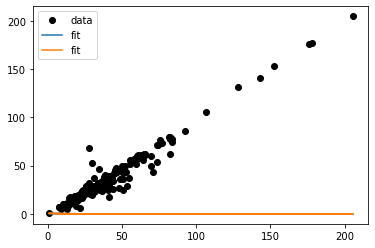

In [16]:
'''fit the dataset using curve fit Import curve fitting package from scipy'''
from scipy.optimize import curve_fit

# x and y data for curve fit method

xdata = Df["2019"]
ydata = Df["2020"]

'''temp is a guassian function that use in curve fit'''
def temp(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
    
'''call method guass from top and make curve fit that is builtin function of scipy'''
parameters, cov = curve_fit(temp,xdata, ydata)

#     split boht parameter
fit_A = parameters[0]
fit_B = parameters[1]

#     fit y 
fit_y = temp(X, fit_A, fit_B)

#     plotting
plt.plot(xdata, ydata, 'o', label='data', color="black")
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

In [17]:
# prediction for future values
from sklearn.cluster import KMeans

'''finding possible num of cluster in given dataset using elbow graph'''
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


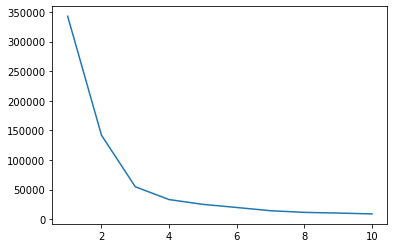

In [19]:
plt.plot(range(1,11),wcss)
plt.show()

In [20]:

'''as graph show possible number of clusters is 4 almost'''


kmeans = KMeans(n_clusters = 4, init = "k-means++")

# fit and predict
y_kmeans = kmeans.fit_predict(X)

y_kmeans



array([0, 0, 2, 0, 0, 2, 3, 3, 0, 3, 2, 0, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0,
       0, 3, 2, 2, 0, 2, 3, 3, 2, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 3, 3, 3,
       2, 1, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 3, 1, 3, 3, 2, 0, 0, 3, 2, 2, 0, 3, 0, 1, 2, 0, 2,
       3, 2, 2, 3, 0, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2, 3, 0, 2, 0, 0, 3, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 3,
       3, 3, 2, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 3, 2, 0, 2, 0, 0, 2, 2])

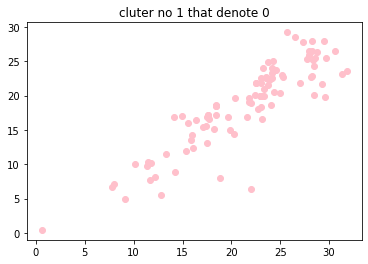

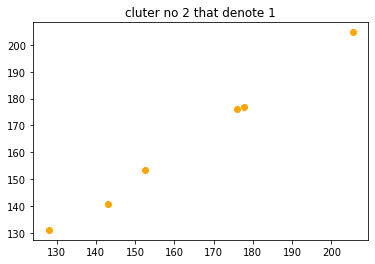

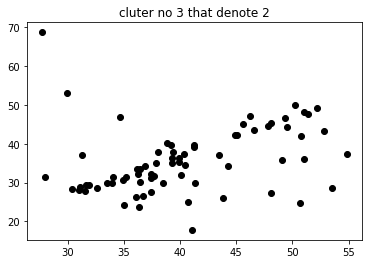

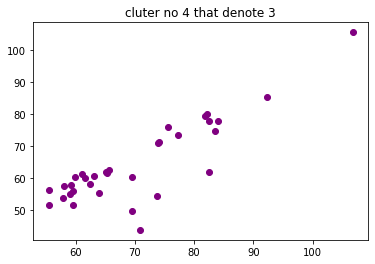

In [25]:
# Interpretation of the results.
'''according to prediction of k mean most of values are 0 then 2 then 3 and 1 is at last 
first cluster is of 0
second cluster is of 2
third cluster is of 3
fourth cluster is of 1'''

c = ["pink","orange", "black","purple"]
for i in range(4):
    string = f"cluter no {i+1} that denote {i}"
    plt.title(string)
    plt.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], color=c[i])
    plt.show()

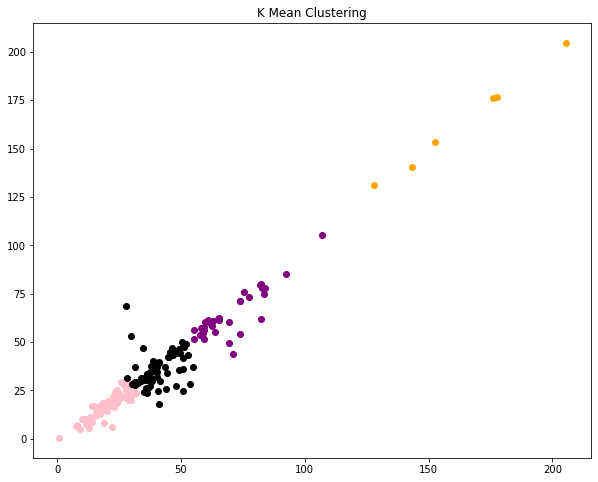

In [26]:
'''now we plotting all in single frame to make different clusters finally'''


plt.figure(figsize = (10,8))
plt.title("K Mean Clustering")
#cluster 1
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], c="pink")

#cluster 2
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], c="orange")

#cluster 3
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], c="black")

plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], c="purple")


